In [2]:
import sys
import os
sys.path.append("../")
import numpy as np 
from utils import *
from lattice import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensornetwork as tn

In [3]:
sps = 3
bd = 2
res = []
for seed in range(0, 5000):
    parent_dir = f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000"
    try:
        u_path, lv = path_with_lowest_loss(parent_dir, absolute_path=True)
        u = np.load(u_path + "/0.npy")
    except:
#         print(f"there are no matrix under the path = {parent_dir}")
        continue
    print(u_path)
    A = FF.block1D(bd, sps, bd, seed=seed)
    A_ = A.transpose(1,0,2)
    A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
    sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]
    print(sle.real)
    A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
    U, s , V = np.linalg.svd(A2)
    Up = U[:, len(s):]
    h = Up @ Up.T
    max_gap = 0
    for L in range(4,5):
        H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
        E = np.linalg.eigvalsh(H)
        gap = E[1] - E[0]
        max_gap = max(gap, max_gap)
#         print(max_gap, seed)
    e = np.linalg.eigvalsh(h)
    h = np.load(f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000/H/0.npy")
    U = np.kron(u,u)
    hu = U @ h @ U.T
    
    res.append({
        "seed" : seed,
        "E" : np.linalg.eigvalsh(H),
        "loss" : lv,
        "gap" : max_gap,
        "gap_loc" : e[1] - e[0],
        "gap_transfer" : sle.real[0] - sle.real[1],
        "n_0" : np.sum(np.round(hu,5) == 0),
        "hu" : hu
    })
    print(f"finish seed = {seed}")

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_0/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17388/u
[1.         0.46373257 0.1586023  0.12083966]
finish seed = 0
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000/u
[ 1.          0.65081001 -0.4673385  -0.6621253 ]
finish seed = 1
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00002/u
[ 1.          0.93664979 -0.20837675 -0.2214984 ]
finish seed = 2
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3/1_mel_Adam/lr_0.001_epoch_10000/loss_0.26422/u
[ 1.          0.26870888 -0.11347844 -0.71713625]
finish seed = 3
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4/1_mel_Adam/l

finish seed = 40
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_41/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09138/u
[ 1.          0.34401019 -0.51795829 -0.62168847]
finish seed = 41
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_42/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01088/u
[ 1.          0.00646607 -0.01165926 -0.02126909]
finish seed = 42
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_43/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02412/u
[1.         0.32492824 0.156066   0.0754351 ]
finish seed = 43
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_44/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00400/u
[ 1.          0.75084153 -0.39501303 -0.53001099]
finish seed = 44
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_278/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01251/u
[ 1.          0.79306126 -0.52596317 -0.61942295]
finish seed = 278
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_279/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06374/u
[ 1.          0.35922068 -0.30085564 -0.39667112]
finish seed = 279
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_280/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18203/u
[ 1.          0.3402768  -0.11920714 -0.42988435]
finish seed = 280
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_281/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02926/u
[ 1.          0.26146376 -0.21423408 -0.33583275]
finish seed = 281
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_520/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00147/u
[1.         0.41408444 0.1660417  0.09145412]
finish seed = 520
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_521/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02174/u
[ 1.          0.53404079 -0.47823711 -0.54825123]
finish seed = 521
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_522/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06444/u
[ 1.          0.65149551 -0.67587152 -0.69523211]
finish seed = 522
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_523/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10465/u
[ 1.          0.17189216 -0.01758531 -0.10670939]
finish seed = 523
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_see

finish seed = 561
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_562/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00114/u
[ 1.          0.76675154 -0.01262749 -0.0159252 ]
finish seed = 562
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_563/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00117/u
[ 1.          0.71232625 -0.54851843 -0.70216568]
finish seed = 563
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_564/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
[1.         0.3099311  0.28885429 0.08972036]
finish seed = 564
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_565/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00555/u
[ 1.          0.21273605 -0.17736233 -0.17931544]
finish seed = 565
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_

finish seed = 792
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_793/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09162/u
[1.         0.5589193  0.3355339  0.29150493]
finish seed = 793
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_794/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23661/u
[1.         0.48413056 0.28551849 0.22222471]
finish seed = 794
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_795/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00033/u
[ 1.          0.14902136 -0.12444224 -0.1679506 ]
finish seed = 795
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_796/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01185/u
[ 1.          0.06682453 -0.06822238 -0.63999469]
finish seed = 796
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1301/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14337/u
[ 1.          0.37434311 -0.45710859 -0.63860398]
finish seed = 1301
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1302/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00015/u
[ 1.          0.627059   -0.06652896 -0.10000955]
finish seed = 1302
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1303/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09248/u
[ 1.          0.44559749 -0.52713945 -0.5423913 ]
finish seed = 1303
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1400/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00072/u
[ 1.          0.48056639 -0.27147453 -0.4242819 ]
finish seed = 1400
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

finish seed = 2021
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2022/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00014/u
[ 1.          0.12316294 -0.04473944 -0.35776795]
finish seed = 2022
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2023/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00191/u
[1.         0.45029042 0.11740867 0.06286229]
finish seed = 2023
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2024/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00072/u
[ 1.          0.4915664  -0.29333122 -0.36470336]
finish seed = 2024
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2025/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08088/u
[ 1.          0.3608361  -0.12478875 -0.49129391]
finish seed = 2025
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2068/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00168/u
[ 1.          0.18655908 -0.31167458 -0.38477899]
finish seed = 2068
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2069/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06985/u
[1.         0.84942899 0.26429447 0.24735877]
finish seed = 2069
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2070/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00185/u
[ 1.          0.48604264 -0.14394127 -0.17971224]
finish seed = 2070
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2071/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00191/u
[ 1.          0.69277792 -0.1552139  -0.22502763]
finish seed = 2071
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2108/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11280/u
[ 1.          0.54836294 -0.14840731 -0.17006027]
finish seed = 2108
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2109/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12909/u
[ 1.          0.8157696  -0.35949145 -0.4475199 ]
finish seed = 2109
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2110/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18436/u
[1.         0.68078434 0.23634232 0.17338842]
finish seed = 2110
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2111/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03691/u
[ 1.          0.14505531 -0.18773359 -0.6135597 ]
finish seed = 2111
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

finish seed = 2154
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2155/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15400/u
[ 1.          0.59133437 -0.11934652 -0.34752275]
finish seed = 2155
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2156/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01143/u
[1.         0.82811328 0.16473165 0.15589341]
finish seed = 2156
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2157/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10021/u
[1.         0.14669081 0.11539863 0.04947436]
finish seed = 2157
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2158/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04724/u
[ 1.          0.84558688 -0.27060474 -0.3611847 ]
finish seed = 2158
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quet

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2212/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12983/u
[ 1.          0.37712229 -0.31970332 -0.55655293]
finish seed = 2212
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2213/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10491/u
[ 1.          0.49471193 -0.28254732 -0.4495707 ]
finish seed = 2213
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2214/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05033/u
[ 1.          0.62954149 -0.41495362 -0.47036137]
finish seed = 2214
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2215/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08590/u
[1.         0.16480698 0.0815332  0.04603963]
finish seed = 2215
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2274/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00069/u
[ 1.          0.21269018 -0.13852906 -0.27515874]
finish seed = 2274
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2275/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05459/u
[ 1.          0.18196865 -0.23180947 -0.27777415]
finish seed = 2275
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2276/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12506/u
[ 1.          0.08970505 -0.00448268 -0.1436734 ]
finish seed = 2276
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2277/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03207/u
[ 1.          0.46788672 -0.40118462 -0.57955746]
finish seed = 2277
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2330/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17071/u
[ 1.          0.28177167 -0.32150639 -0.57594614]
finish seed = 2330
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2331/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01962/u
[ 1.          0.13210743 -0.19789478 -0.5368596 ]
finish seed = 2331
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2332/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00662/u
[ 1.          0.14816703 -0.02593104 -0.04494155]
finish seed = 2332
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2333/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11294/u
[ 1.          0.22082108 -0.18747243 -0.82109077]
finish seed = 2333
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

finish seed = 3040
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3041/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10262/u
[ 1.          0.35724046 -0.33048628 -0.65161383]
finish seed = 3041
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3042/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03272/u
[ 1.          0.35428441 -0.02782746 -0.03344398]
finish seed = 3042
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3043/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18431/u
[ 1.          0.31560586 -0.47785878 -0.51698107]
finish seed = 3043
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3044/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00994/u
[ 1.          0.37403194 -0.39979843 -0.40695213]
finish seed = 3044
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3089/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11171/u
[ 1.          0.62032329 -0.56841738 -0.90680279]
finish seed = 3089
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3090/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10320/u
[ 1.          0.24686147  0.10223925 -0.0703533 ]
finish seed = 3090
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3091/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
[ 1.          0.45805918 -0.338945   -0.44242649]
finish seed = 3091
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3092/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16070/u
[ 1.          0.4926598  -0.51418104 -0.84040696]
finish seed = 3092
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3139/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03815/u
[1.         0.61079107 0.30148031 0.22535593]
finish seed = 3139
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3140/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00009/u
[1.         0.22231952 0.18934248 0.17883078]
finish seed = 3140
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3141/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13215/u
[1.         0.71571073 0.15070948 0.12305844]
finish seed = 3141
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3142/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00273/u
[ 1.          0.46112721 -0.64932315 -0.70907573]
finish seed = 3142
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_see

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3197/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00227/u
[ 1.          0.61493882 -0.25643881 -0.44016727]
finish seed = 3197
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3198/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10960/u
[1.         0.6764796  0.18158913 0.17066379]
finish seed = 3198
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3199/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22566/u
[ 1.          0.48905196 -0.51674293 -0.80099323]
finish seed = 3199
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3200/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10185/u
[ 1.          0.71674697 -0.503829   -0.50748189]
finish seed = 3200
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

finish seed = 3245
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3246/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07552/u
[ 1.          0.28581697 -0.20179436 -0.33622169]
finish seed = 3246
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3247/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00183/u
[ 1.          0.75711554 -0.29672273 -0.32609996]
finish seed = 3247
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3248/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14367/u
[ 1.          0.25387037 -0.24748356 -0.32397954]
finish seed = 3248
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3249/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05778/u
[ 1.          0.47861605  0.02672552 -0.09747662]
finish seed = 3249
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3296/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11167/u
[ 1.          0.38476585 -0.23418025 -0.24574702]
finish seed = 3296
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3297/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06069/u
[ 1.          0.48874447 -0.06906419 -0.07681919]
finish seed = 3297
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3298/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05542/u
[ 1.          0.7848207  -0.35770425 -0.46884233]
finish seed = 3298
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3299/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19160/u
[ 1.          0.4032339  -0.25829473 -0.51757982]
finish seed = 3299
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

finish seed = 3337
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3338/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22250/u
[1.         0.29603378 0.21857468 0.218059  ]
finish seed = 3338
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3339/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00003/u
[ 1.          0.28056822 -0.08611167 -0.31132259]
finish seed = 3339
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3340/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00336/u
[ 1.          0.24283731 -0.1509491  -0.39769092]
finish seed = 3340
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3341/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01488/u
[1.         0.71155145 0.16442748 0.15625917]
finish seed = 3341
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quet

finish seed = 3395
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3396/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11919/u
[ 1.          0.93299367 -0.20675969 -0.2487728 ]
finish seed = 3396
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3397/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03701/u
[ 1.          0.06663581  0.02187204 -0.10045277]
finish seed = 3397
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3398/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11813/u
[ 1.          0.26715465 -0.27511816 -0.58257619]
finish seed = 3398
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3399/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10364/u
[ 1.          0.61789266  0.10845071 -0.21938685]
finish seed = 3399
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_

finish seed = 3439
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3440/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01820/u
[ 1.          0.54523743 -0.57559149 -0.87541958]
finish seed = 3440
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3441/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10194/u
[ 1.          0.14342423 -0.26719061 -0.35468972]
finish seed = 3441
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3442/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00535/u
[ 1.          0.4174281  -0.4616985  -0.50774135]
finish seed = 3442
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3443/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07336/u
[ 1.          0.27358331 -0.34339256 -0.69154212]
finish seed = 3443
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3482/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00007/u
[1.         0.68191318 0.18987168 0.13679544]
finish seed = 3482
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3483/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02632/u
[ 1.          0.14317469 -0.03729242 -0.40344733]
finish seed = 3483
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3484/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11670/u
[ 1.          0.78973386 -0.240944   -0.31357262]
finish seed = 3484
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3485/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01683/u
[ 1.          0.08202544 -0.23676769 -0.31641795]
finish seed = 3485
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3531/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05234/u
[ 1.          0.28810251 -0.08093033 -0.08147953]
finish seed = 3531
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3532/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10709/u
[ 1.          0.62582474 -0.04624903 -0.24109796]
finish seed = 3532
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3533/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00149/u
[ 1.          0.2047779  -0.08269156 -0.20620252]
finish seed = 3533
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3534/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03881/u
[ 1.          0.59402574 -0.58097841 -0.82778991]
finish seed = 3534
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

finish seed = 3571
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3572/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01268/u
[ 1.          0.43498146 -0.1471521  -0.15174272]
finish seed = 3572
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3573/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07694/u
[1.         0.90789    0.45888516 0.42078251]
finish seed = 3573
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3574/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00201/u
[ 1.          0.13276354 -0.11237552 -0.11905806]
finish seed = 3574
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3575/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00010/u
[ 1.          0.34428177 -0.09887157 -0.27019497]
finish seed = 3575
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3629/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03094/u
[ 1.          0.15958805 -0.2195265  -0.40030546]
finish seed = 3629
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3630/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14644/u
[ 1.          0.20671573 -0.23485169 -0.33076718]
finish seed = 3630
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3631/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06032/u
[ 1.          0.22073623 -0.27554739 -0.54069002]
finish seed = 3631
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3632/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00521/u
[ 1.          0.60847418 -0.57540723 -0.8837952 ]
finish seed = 3632
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3674/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00317/u
[ 1.          0.58234289 -0.40060985 -0.43254718]
finish seed = 3674
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3675/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00913/u
[ 1.          0.05084434 -0.08895752 -0.4059752 ]
finish seed = 3675
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3676/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19703/u
[ 1.          0.52970412 -0.30678978 -0.32995218]
finish seed = 3676
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3677/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10579/u
[1.         0.89930211 0.13917115 0.10636337]
finish seed = 3677
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3718/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07970/u
[ 1.          0.51674215 -0.25006323 -0.31223722]
finish seed = 3718
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3719/1_mel_Adam/lr_0.001_epoch_10000/loss_0.20056/u
[ 1.          0.61090695 -0.33945024 -0.66082485]
finish seed = 3719
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3720/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00117/u
[ 1.          0.54254212 -0.20221331 -0.39045505]
finish seed = 3720
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3721/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04731/u
[ 1.          0.75141278 -0.69173483 -0.92479988]
finish seed = 3721
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3776/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00641/u
[ 1.          0.51994066 -0.24640382 -0.5037924 ]
finish seed = 3776
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3777/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03769/u
[ 1.          0.16077467 -0.11706995 -0.47932041]
finish seed = 3777
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3778/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00121/u
[ 1.          0.2997852  -0.11378947 -0.40838302]
finish seed = 3778
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3779/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00290/u
[ 1.          0.2662996  -0.20727002 -0.36928894]
finish seed = 3779
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3842/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11217/u
[1.         0.44657319 0.23999386 0.19644731]
finish seed = 3842
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3843/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18638/u
[1.         0.73665561 0.2950311  0.20868329]
finish seed = 3843
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3844/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01880/u
[ 1.          0.39366814 -0.11795499 -0.32534209]
finish seed = 3844
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3845/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21580/u
[ 1.          0.43545001 -0.53134413 -0.53751844]
finish seed = 3845
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1

finish seed = 3905
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3906/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11911/u
[ 1.          0.78645678 -0.05290294 -0.22961406]
finish seed = 3906
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3907/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00384/u
[ 1.          0.07904691 -0.20664546 -0.20880819]
finish seed = 3907
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3908/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10670/u
[ 1.          0.41865109 -0.07947333 -0.37638089]
finish seed = 3908
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3909/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16831/u
[ 1.          0.16671069 -0.07051563 -0.22079086]
finish seed = 3909
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_

finish seed = 3954
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3955/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00271/u
[ 1.          0.72061283 -0.06024214 -0.07977356]
finish seed = 3955
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3956/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
[ 1.          0.24406693 -0.26529953 -0.32219418]
finish seed = 3956
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3957/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05215/u
[1.         0.68675855 0.40509889 0.13167903]
finish seed = 3957
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3958/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00017/u
[ 1.          0.71072361 -0.61725246 -0.83528364]
finish seed = 3958
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4006/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06912/u
[ 1.          0.11506994 -0.1178171  -0.13690747]
finish seed = 4006
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4007/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10942/u
[ 1.          0.05746083 -0.09595142 -0.12447104]
finish seed = 4007
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4008/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00044/u
[ 1.          0.05651506 -0.03372139 -0.3304419 ]
finish seed = 4008
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4009/1_mel_Adam/lr_0.001_epoch_10000/loss_0.25021/u
[ 1.          0.44236148 -0.10474733 -0.54901609]
finish seed = 4009
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4066/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03196/u
[1.         0.22148343 0.03063242 0.00553649]
finish seed = 4066
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4067/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13073/u
[ 1.          0.1775759  -0.14335192 -0.58526961]
finish seed = 4067
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4068/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
[ 1.          0.5493304  -0.23923226 -0.43066209]
finish seed = 4068
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4069/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13965/u
[1.         0.26921899 0.23851713 0.17717975]
finish seed = 4069
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1

finish seed = 4122
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4123/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10428/u
[ 1.          0.33554412 -0.24548511 -0.36191843]
finish seed = 4123
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4124/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04645/u
[ 1.          0.07175521 -0.01083324 -0.2288829 ]
finish seed = 4124
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4125/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00019/u
[1.         0.41704676 0.11120728 0.0800765 ]
finish seed = 4125
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4126/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00356/u
[ 1.          0.81803741 -0.52712239 -0.65188237]
finish seed = 4126
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_

finish seed = 4176
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4177/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00036/u
[ 1.          0.73923865 -0.67293102 -0.82602037]
finish seed = 4177
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4178/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16674/u
[ 1.          0.47633627  0.17571068 -0.26130507]
finish seed = 4178
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4179/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01099/u
[ 1.          0.74604839 -0.63437908 -0.76220105]
finish seed = 4179
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4180/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01788/u
[ 1.          0.04545164 -0.04569169 -0.15066746]
finish seed = 4180
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_

finish seed = 4223
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4224/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22707/u
[ 1.          0.32465684 -0.27885684 -0.48675372]
finish seed = 4224
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4225/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00494/u
[1.00000000e+00 6.94824611e-02 4.51739474e-03 5.95899955e-04]
finish seed = 4225
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4226/1_mel_Adam/lr_0.001_epoch_10000/loss_0.20137/u
[ 1.          0.6258782  -0.54031075 -0.64544504]
finish seed = 4226
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4227/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08895/u
[ 1.          0.95818434 -0.38734997 -0.40972449]
finish seed = 4227
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4275/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00054/u
[1.         0.59154418 0.26107385 0.15751443]
finish seed = 4275
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4276/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04782/u
[ 1.          0.90524238 -0.74208337 -0.78810497]
finish seed = 4276
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4277/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00065/u
[ 1.          0.87829133 -0.58258095 -0.66275628]
finish seed = 4277
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4278/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08007/u
[ 1.          0.47709741 -0.11997467 -0.22013846]
finish seed = 4278
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4331/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00539/u
[1.         0.44373834 0.27813269 0.13545995]
finish seed = 4331
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4332/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15728/u
[ 1.          0.09305108 -0.0930585  -0.125865  ]
finish seed = 4332
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4333/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06960/u
[ 1.          0.8526517  -0.03760389 -0.11701607]
finish seed = 4333
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4334/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15893/u
[ 1.          0.12451094 -0.15814055 -0.17086025]
finish seed = 4334
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4402/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00062/u
[ 1.          0.09686018 -0.10363933 -0.92738158]
finish seed = 4402
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4403/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04319/u
[ 1.          0.10730705 -0.16194527 -0.44181004]
finish seed = 4403
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4404/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05136/u
[ 1.          0.34775965  0.05186747 -0.00213211]
finish seed = 4404
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4405/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00131/u
[ 1.          0.00788642 -0.02276795 -0.14478037]
finish seed = 4405
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4442/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19296/u
[ 1.          0.45478247 -0.04193975 -0.38248338]
finish seed = 4442
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4443/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01034/u
[ 1.          0.82761785 -0.4636088  -0.57837415]
finish seed = 4443
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4444/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18125/u
[ 1.          0.50446466 -0.45503764 -0.45849037]
finish seed = 4444
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4445/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02095/u
[ 1.          0.32953677  0.07785647 -0.03172465]
finish seed = 4445
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4485/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19694/u
[ 1.          0.63168594 -0.54223651 -0.72815307]
finish seed = 4485
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4486/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15757/u
[ 1.          0.64474499 -0.18524109 -0.45074747]
finish seed = 4486
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4487/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00475/u
[ 1.          0.8750721  -0.43085507 -0.47652262]
finish seed = 4487
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4488/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00307/u
[1.         0.79959278 0.56738382 0.50021066]
finish seed = 4488
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4551/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14917/u
[ 1.          0.30669019 -0.33147604 -0.72373758]
finish seed = 4551
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4552/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01236/u
[ 1.          0.31082642 -0.11461192 -0.46335649]
finish seed = 4552
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4553/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01053/u
[ 1.00000000e+00  1.59755184e-01  1.63025516e-04 -1.11009393e-01]
finish seed = 4553
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4554/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15286/u
[ 1.          0.59780928 -0.19770999 -0.58110467]
finish seed = 4554
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4593/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001/u
[ 1.          0.39063334 -0.15819415 -0.19322332]
finish seed = 4593
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4594/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06166/u
[ 1.          0.2416616  -0.37895397 -0.53834787]
finish seed = 4594
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4595/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00963/u
[1.         0.47013114 0.06180056 0.04570077]
finish seed = 4595
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4596/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06901/u
[ 1.          0.18223322  0.05512355 -0.20783841]
finish seed = 4596
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_loc_quetta/s_3_r_2_lt_1

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(res)

In [17]:
df = df.sort_values(by="loss")
np.round(df.hu[3],3)

array([[-0.735,  0.   ,  0.08 ,  0.   ,  0.337, -0.   ,  0.08 , -0.   ,
        -0.262],
       [ 0.   , -0.723, -0.066,  0.018, -0.029, -0.436, -0.024,  0.   ,
        -0.065],
       [ 0.08 , -0.066, -0.946, -0.024,  0.173,  0.083,  0.047,  0.011,
         0.028],
       [ 0.   ,  0.018, -0.024, -0.723, -0.029,  0.   , -0.066, -0.436,
        -0.065],
       [ 0.337, -0.029,  0.173, -0.029, -0.261, -0.055,  0.173, -0.055,
         0.111],
       [-0.   , -0.436,  0.083,  0.   , -0.055, -0.28 ,  0.011, -0.014,
        -0.041],
       [ 0.08 , -0.024,  0.047, -0.066,  0.173,  0.011, -0.946,  0.083,
         0.028],
       [-0.   ,  0.   ,  0.011, -0.436, -0.055, -0.014,  0.083, -0.28 ,
        -0.041],
       [-0.262, -0.065,  0.028, -0.065,  0.111, -0.041,  0.028, -0.041,
        -0.105]])

### raw data

- Are loss for low gapped data necessarily small?
    - If so, below how many energy gap?
- Should it behave like linear? If so, theorically optimize the outliers upto emperical line?
 

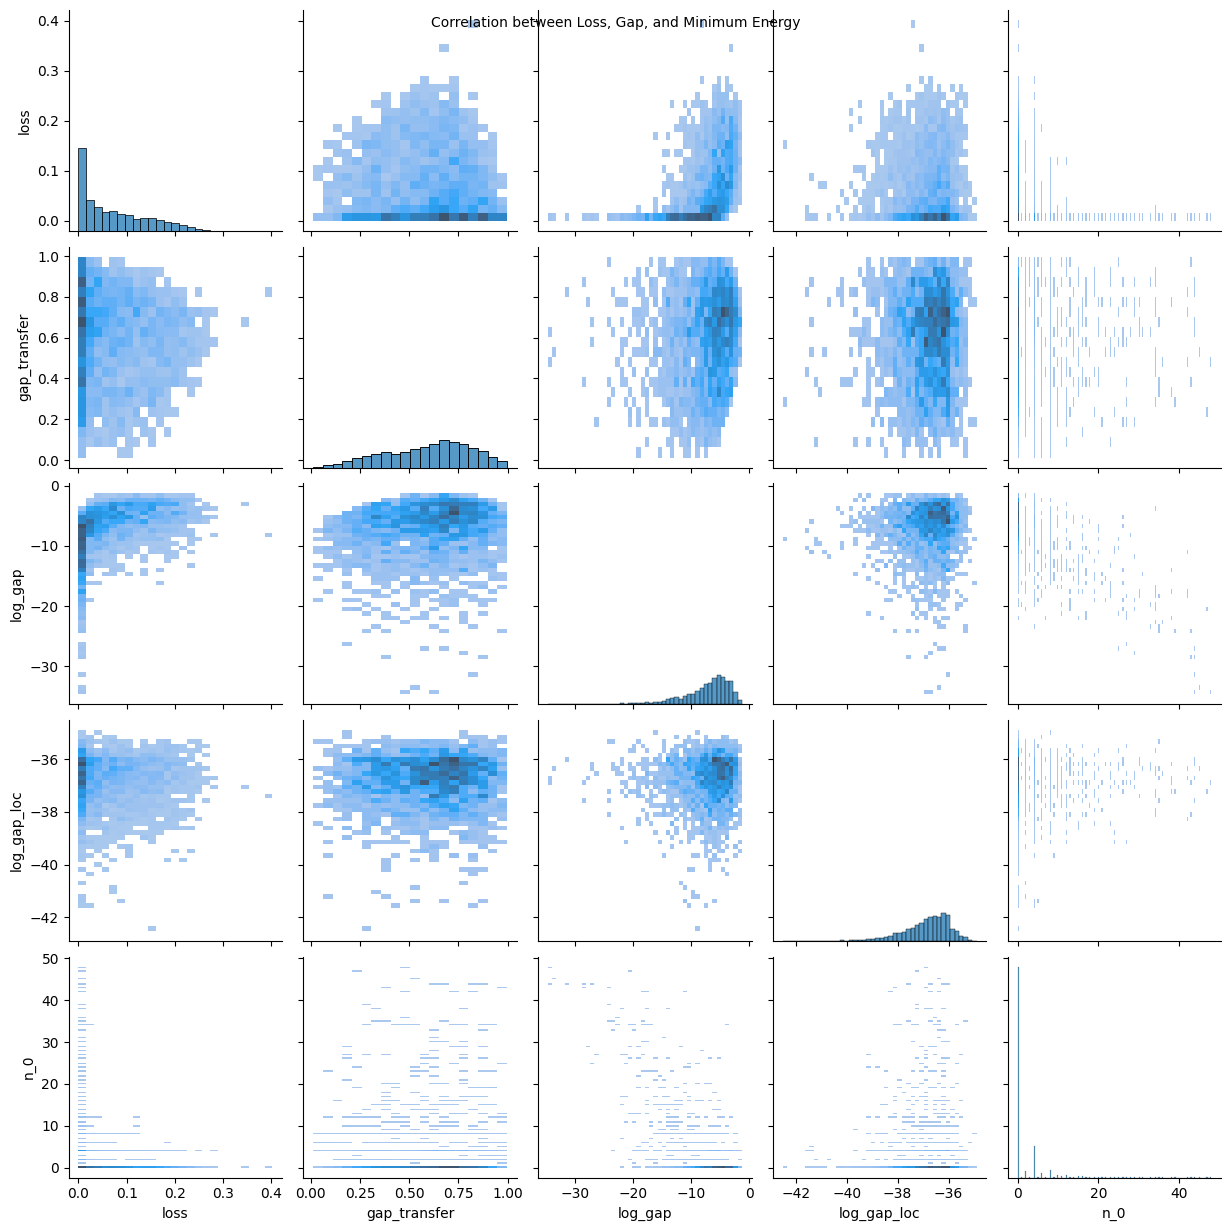

In [4]:
df = pd.DataFrame(res)
df['min_energy'] = df['E'].apply(lambda x: x[1])
df["log_gap"] = df.gap.apply(np.log)
df["log_gap_loc"] = df.gap_loc.apply(np.log)
df["log_loss"] = df.loss.apply(lambda x: np.log(x+0.0001))
# Create a pairplot to visualize the correlations between loss, gap, and minimum energy.
sns.pairplot(df[['loss', 'gap_transfer', "log_gap", "log_gap_loc", "n_0"]] , kind='hist')

# Set titles and labels.
plt.suptitle('Correlation between Loss, Gap, and Minimum Energy', size=10)
plt.show()

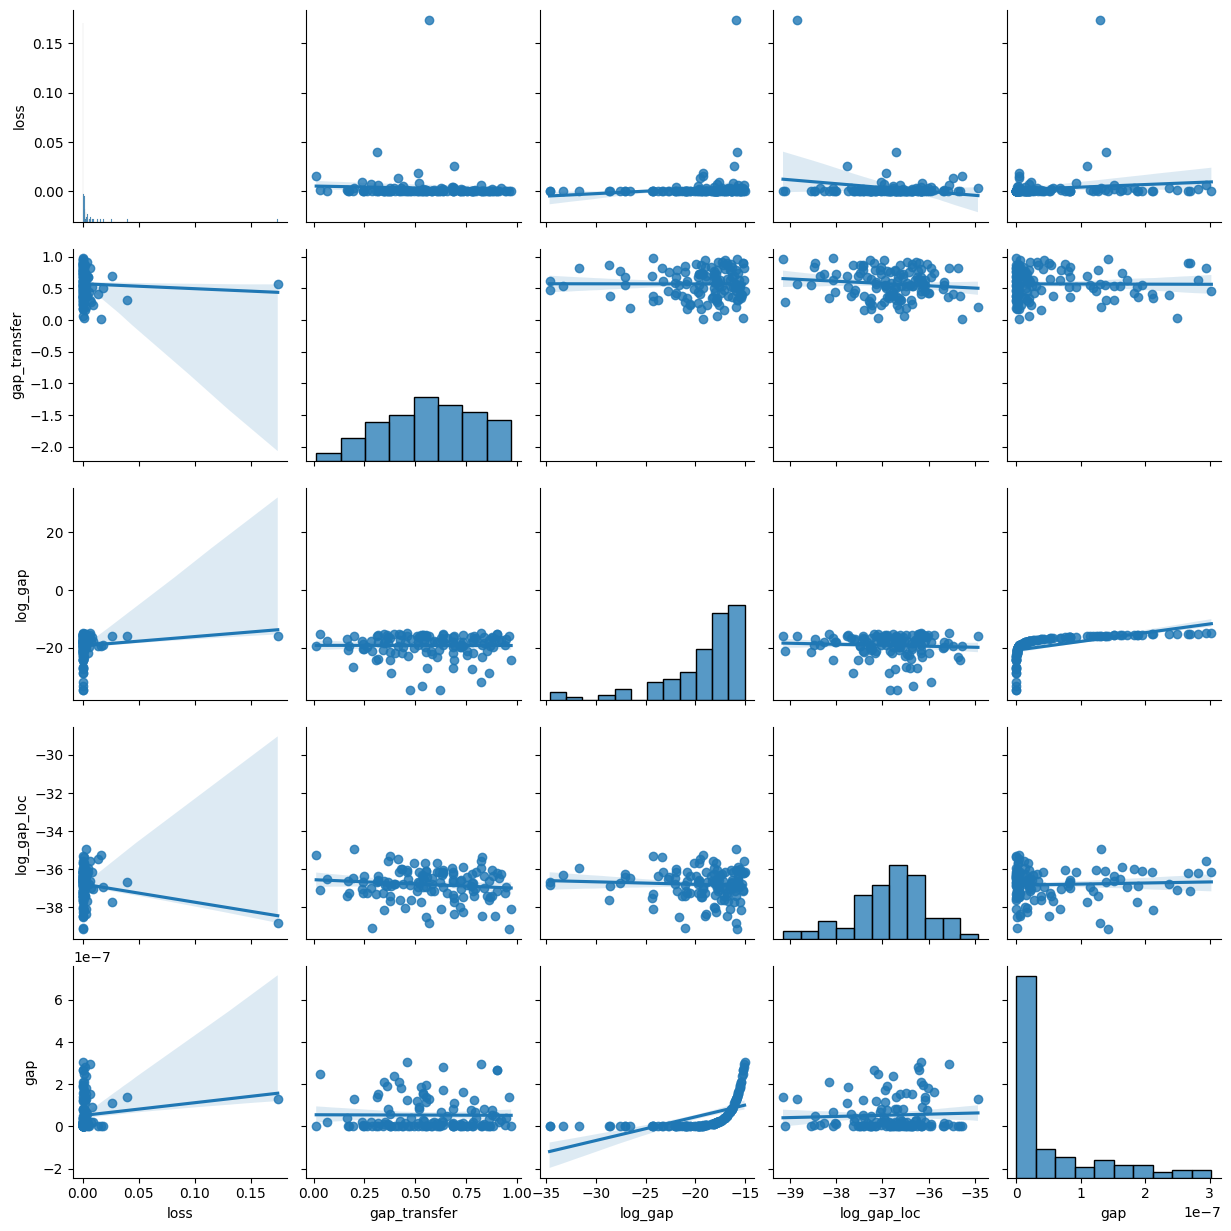

In [5]:
sns.pairplot(df[df.log_gap < -15][['loss', 'gap_transfer', "log_gap", "log_gap_loc", "gap"]] , kind='reg' , diag_kind="hist")

In [39]:
[np.log(E[1])]

[-1.0559387088777148]

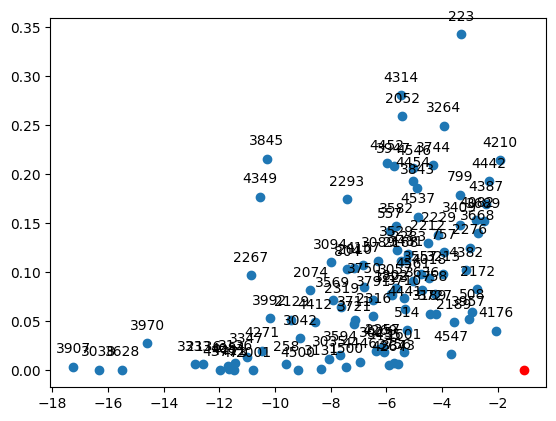

In [41]:
import matplotlib.pyplot as plt
sample_df = df.sample(n=100, random_state=1)
plt.scatter(sample_df['log_gap'], sample_df['loss'])  # Plot each point
for i in range(len(sample_df)):
    plt.annotate(sample_df['seed'].iloc[i],  # This is the text to display
                 (sample_df['log_gap'].iloc[i], sample_df['loss'].iloc[i]),  # This is the point to which the text is annotated
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.scatter([np.log(E[1])], [0], color = "red", label = "AKLT")
plt.show()

## AKLT

In [31]:
A = np.zeros((3, 2, 2))
A[0][1,0] = -1/np.sqrt(2)
A[2][0,1] = 1/np.sqrt(2)
A[1][0,0] = 1/2
A[1][1,1] = -1/2
A = A.transpose(1,0,2)
A = get_canonical_form(A)
A_ = A.transpose(1,0,2)
A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]
A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
U, s , V = np.linalg.svd(A2)
Up = U[:, len(s):]
h = Up @ Up.T
L = 6
H = sum_ham(h, [[i, (i+1)%L] for i in range(L)], L, 3)
E = np.linalg.eigvalsh(H)

In [32]:
Sz = np.zeros([3,3])
Sz[0,0] = 1
Sz[2,2] = -1
Sx = np.zeros([3, 3])
Sx[1,0] = Sx[0,1] = Sx[2,1] = Sx[1,2] = 1/np.sqrt(2)
Sy = np.zeros([3, 3], dtype=np.complex64)
Sy[1,0] = Sy[2,1] = 1j/np.sqrt(2)
Sy[0,1] = Sy[1,2] = -1j/np.sqrt(2)


SzSz = np.kron(Sz,Sz).astype(np.float64)
SxSx = np.kron(Sx,Sx).astype(np.float64)
SySy = np.kron(Sy,Sy).astype(np.float64)

lh = SzSz + SxSx + SySy
J = [1, 1/3]
lh = -(lh + lh@lh*J[1]) + 1/3 * np.eye(lh.shape[0])
L = 6
H = sum_ham(lh, [[i, (i+1)%L] for i in range(L)], L, 3)
H = -H + L * np.eye(H.shape[0])
H = H/2
Ea = np.linalg.eigvalsh(H)

/var/folders/z7/m5qzz0hj12z06hxsn5km2c400000gn/T/ipykernel_5260/1303863431.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  SySy = np.kron(Sy,Sy).astype(np.float64)


In [36]:
E

array([-6.21724894e-15,  3.47865729e-01,  3.47865729e-01,  3.47865729e-01,
        6.01885018e-01,  6.01885018e-01,  6.01885018e-01,  6.01885018e-01,
        6.01885018e-01,  6.01885018e-01,  7.58330791e-01,  7.58330791e-01,
        7.58330791e-01,  7.58330791e-01,  7.58330791e-01,  8.77281879e-01,
        8.77281879e-01,  8.77281879e-01,  8.77281879e-01,  8.77281879e-01,
        8.77281879e-01,  9.14351131e-01,  1.17461747e+00,  1.17461747e+00,
        1.17461747e+00,  1.17461747e+00,  1.17461747e+00,  1.17461747e+00,
        1.17461747e+00,  1.17461747e+00,  1.17461747e+00,  1.17461747e+00,
        1.21703210e+00,  1.21703210e+00,  1.21703210e+00,  1.21703210e+00,
        1.21703210e+00,  1.21703210e+00,  1.21703210e+00,  1.21703210e+00,
        1.21703210e+00,  1.21703210e+00,  1.31150951e+00,  1.31150951e+00,
        1.31150951e+00,  1.31150951e+00,  1.31150951e+00,  1.31150951e+00,
        1.31150951e+00,  1.33333333e+00,  1.33333333e+00,  1.41184165e+00,
        1.41184165e+00,  

In [35]:
np.linalg.norm(Ea - E)

1.8605017227140838e-06

### Remove high gapped data
tbd

# Canonical form

## Calculate transfer matrix

In [8]:
# for seed in range(0, 11):
seed = 0
A = FF.block1D(bd, sps, bd, seed=seed)
A_ = A.transpose(1,0,2)
A_tilde_ = np.einsum("ijk,ilm->jlkm", A_, A_)
A_tilde = A_tilde_.reshape(4,4)
e, V = np.linalg.eigh(A_tilde)
rho = e[-1]
A_tilde = A_tilde / rho

e, V = np.linalg.eigh(A_tilde)
x = V[:,-1].reshape(2,2)

e, U = np.linalg.eigh(x)
x_h = U @ np.diag(np.sqrt(e + 0j)) @ U.T
x_h_inv = U @ np.diag(1/np.sqrt(e + 0j)) @ U.T

B = x_h_inv @ A_ @ x_h / np.sqrt(rho) #canonical form
B = B.transpose(1,0,2)


In [9]:
check_cano = np.einsum("jik, lik->jl",B, B)
print("is identity : ",  np.linalg.norm(np.eye(2) - check_cano))

is identity :  2.9373740229761033e-16


### Spectrum must be same for A and B

In [10]:
B_ = B.transpose(1,0,2)
B_tilde_ = np.einsum("ijk,ilm->jlkm", B_, B_).reshape(4,4)
Eb = np.linalg.eigvals(B_tilde_)
Ea = np.linalg.eigvals(A_tilde)
print(np.linalg.norm(Ea.real - Eb.real))
print(Eb[1].real)
print(Ea[1])

2.665835984225005e-16
0.46373257491552144
0.4637325749155212


### aggrigate all second largest eigenvalue and store into dataframe 

### Check both actually return same MPS

In [118]:
mps_nodes, mps_edges = FF.create_MPS(6, A)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y1 = C.tensor.reshape(-1)
y1 /= np.linalg.norm(y1)

mps_nodes, mps_edges = FF.create_MPS(6, B)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y2 = C.tensor.reshape(-1)
y2 /= np.linalg.norm(y2)
print("y1 - y2 : ", np.linalg.norm(y1-y2))

y1 - y2 :  8.987388080934195e-16


In [165]:
Ea, Eb

(array([1.        , 0.46373257, 0.1586023 , 0.12083966]),
 array([1.        +0.j, 0.46373257+0.j, 0.1586023 +0.j, 0.12083966+0.j]))

In [37]:
for key, val in res.items():
    print(f'loss: {val["loss"]}')
    print(f'gap : {val["gap"]}')
    print(f"et : {val['et']}")
    print(f"et2 : {val['et2']}")
    print("\n")

loss: 0.17387
gap : 0.014409947267715335
et : [1.07903285 1.41623274 4.14088113 8.92945925]
et2 : [ 1.16431189  2.00571517 17.14689655 79.73524257]


loss: 0.0
gap : 3.808084226575378e-08
et : [-3.52683104 -2.4892931   3.46655985  5.3265312 ]
et2 : [ 6.19658016 12.01703717 12.43853718 28.37193457]


loss: 2e-05
gap : 3.088894926684373e-08
et : [-1.80583275 -1.69885453  7.63632091  8.15280263]
et2 : [ 2.8861067   3.26103194 58.31339699 66.46819078]


loss: 0.26422
gap : 0.022424657326068447
et : [-3.0497284  -0.4825839   1.14272441  4.25264852]
et2 : [ 0.23288722  1.30581908  9.30084333 18.08501945]


loss: 0.09499
gap : 0.012584317829217564
et : [0.7080587  0.83183422 0.92752041 2.80439502]
et2 : [0.50134713 0.69194816 0.86029412 7.86463145]


loss: 0.06638
gap : 0.00510515577127765
et : [-1.50881426 -0.8815801   0.66147717  6.17440182]
et2 : [ 0.43755205  0.77718348  2.27652046 38.12323784]


loss: 0.027
gap : 0.00046814891419191395
et : [-5.25731758 -2.88693889  2.25853235 12.8175936